In [4]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [1]:
import random
import pandas as pd
import numpy as np
from scipy import stats

gi = pd.read_csv("Glass Identification.csv")
gi['random'] = np.random.random(len(gi))
random_data = gi.loc[gi['random'] <= 0.1]
random_data.head(10)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,random
10,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1,0.046407
15,16,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1,0.092181
20,21,1.51750,12.82,3.55,1.49,72.75,0.54,8.52,0.00,0.19,1,0.097222
23,24,1.51751,12.81,3.57,1.35,73.02,0.62,8.59,0.00,0.00,1,0.099813
29,30,1.51784,13.08,3.49,1.28,72.86,0.60,8.49,0.00,0.00,1,0.041592
60,61,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00,1,0.036457
61,62,1.51977,13.81,3.58,1.32,71.72,0.12,8.67,0.69,0.00,1,0.007935
65,66,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.00,0.00,1,0.026702
79,80,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.00,0.00,2,0.084922
96,97,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.00,0.15,2,0.004540


## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [3]:
gi.replace(0, gi.median())

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,random
0,1,1.52101,13.64,4.49,1.10,71.78,0.060,8.75,0.00,0.00,1,0.708259
1,2,1.51761,13.89,3.60,1.36,72.73,0.480,7.83,0.00,0.00,1,0.114665
2,3,1.51618,13.53,3.55,1.54,72.99,0.390,7.78,0.00,0.00,1,0.479280
3,4,1.51766,13.21,3.69,1.29,72.61,0.570,8.22,0.00,0.00,1,0.514826
4,5,1.51742,13.27,3.62,1.24,73.08,0.550,8.07,0.00,0.00,1,0.640487
5,6,1.51596,12.79,3.61,1.62,72.97,0.640,8.07,0.00,0.26,1,0.710873
6,7,1.51743,13.30,3.60,1.14,73.09,0.580,8.17,0.00,0.00,1,0.833248
7,8,1.51756,13.15,3.61,1.05,73.24,0.570,8.24,0.00,0.00,1,0.300152
8,9,1.51918,14.04,3.58,1.37,72.08,0.560,8.30,0.00,0.00,1,0.391776
9,10,1.51755,13.00,3.60,1.36,72.99,0.570,8.40,0.00,0.11,1,0.219512


## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


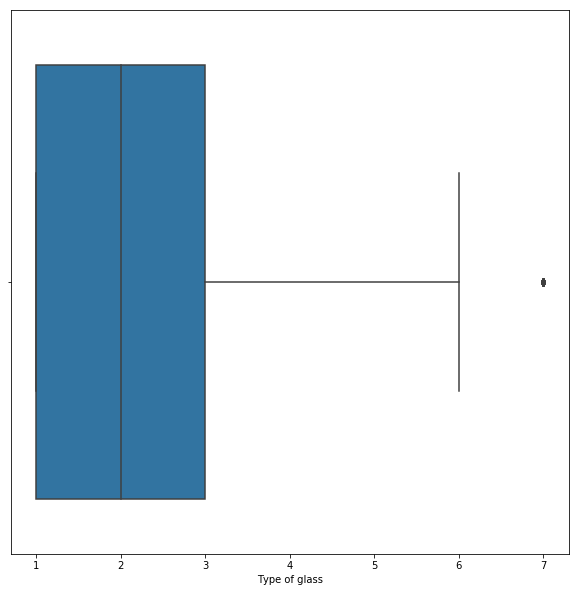

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize = (10,10))
sns.boxplot(x = "Type of glass", data = gi, ax=axs);

## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [7]:
gi.var()

ID               3834.166667
RI                  0.000009
Na                  0.666841
Mg                  2.080540
Al                  0.249270
Si                  0.599921
K                   0.425354
Ca                  2.025366
Ba                  0.247227
Fe                  0.009494
Type of glass       4.425716
random              0.083138
dtype: float64

In [8]:
# As the variance of RI and FE are less than 0.1. So here we need drop the RI and Fe columns as this will not have any influence on the classification.
gi.loc[:, gi.var() > 0.1 ]

,ID,Na,Mg,Al,Si,K,Ca,Ba,Type of glass
0,1,13.64,4.49,1.10,71.78,0.06,8.75,0.00,1
1,2,13.89,3.60,1.36,72.73,0.48,7.83,0.00,1
2,3,13.53,3.55,1.54,72.99,0.39,7.78,0.00,1
3,4,13.21,3.69,1.29,72.61,0.57,8.22,0.00,1
4,5,13.27,3.62,1.24,73.08,0.55,8.07,0.00,1
5,6,12.79,3.61,1.62,72.97,0.64,8.07,0.00,1
6,7,13.30,3.60,1.14,73.09,0.58,8.17,0.00,1
7,8,13.15,3.61,1.05,73.24,0.57,8.24,0.00,1
8,9,14.04,3.58,1.37,72.08,0.56,8.30,0.00,1
9,10,13.00,3.60,1.36,72.99,0.57,8.40,0.00,1


## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*

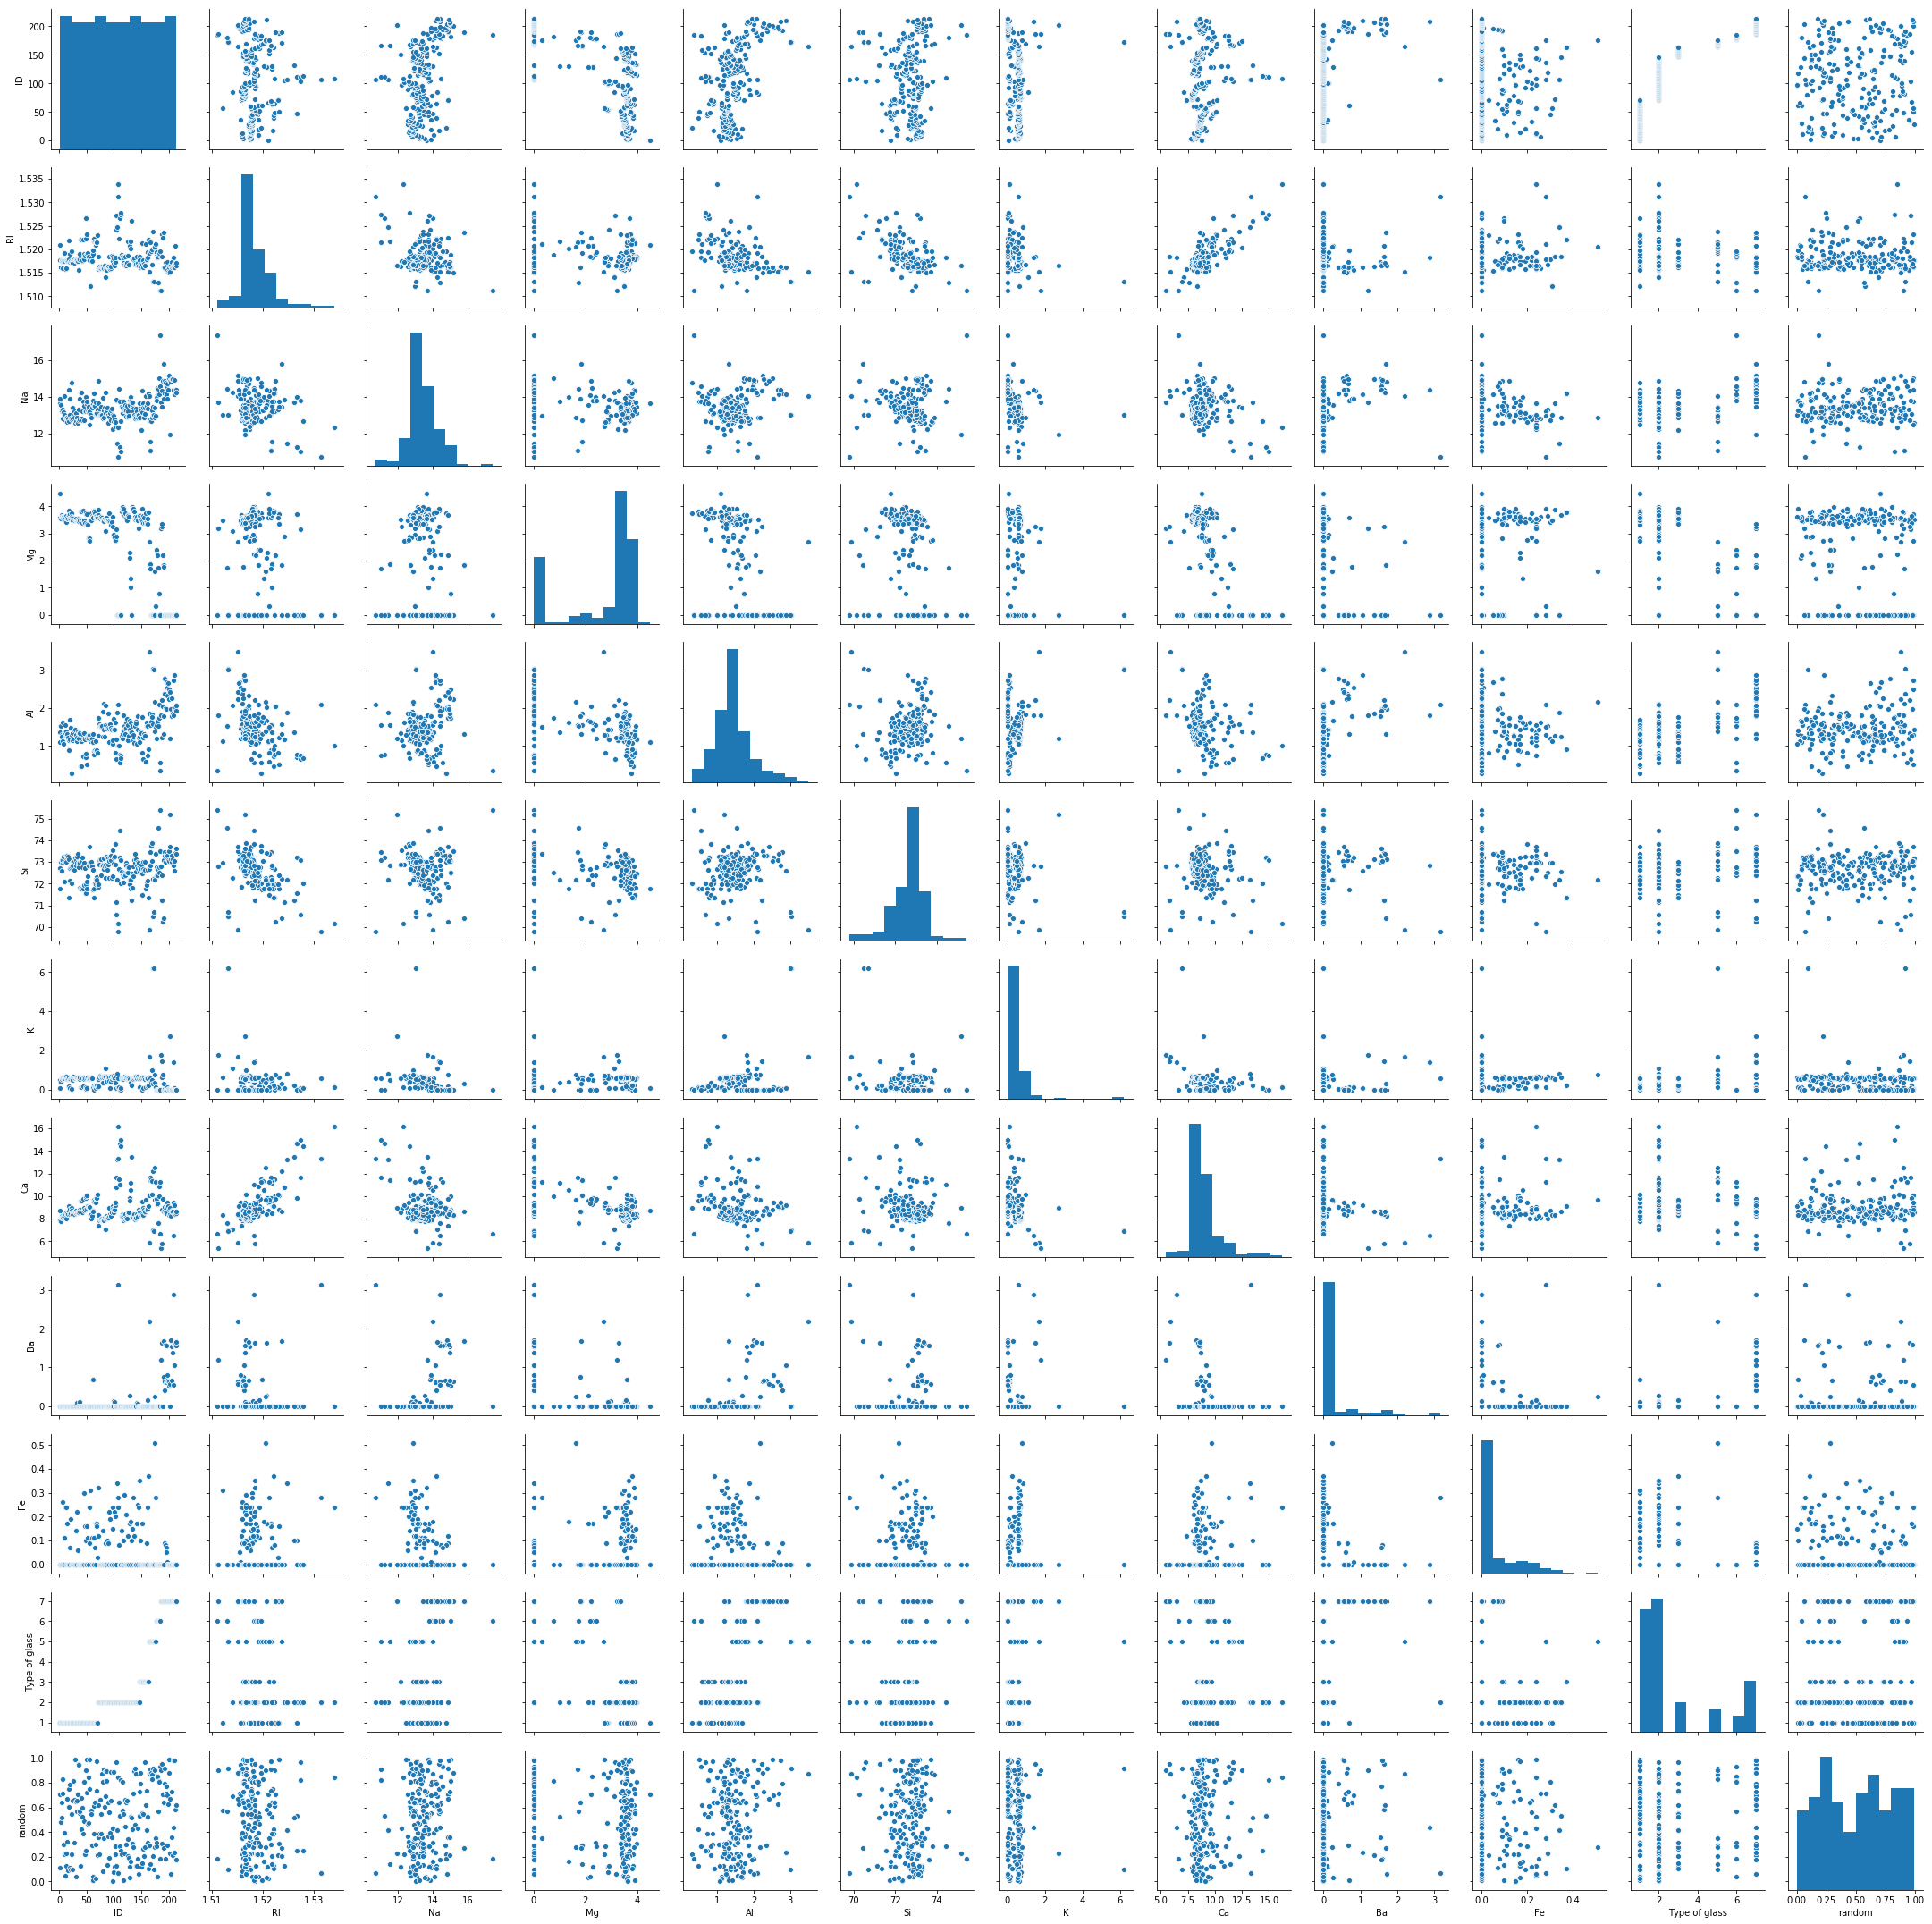

In [9]:
sns.pairplot(gi)

## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [12]:
gi_df = gi.drop(labels= "Type of glass" , axis = 1)
gi_df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,random
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0.708259
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0.114665
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0.479280
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0.514826
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0.640487


In [13]:
gi_z = gi_df.apply(zscore)  # convert all attributes to Z scale 

gi_z.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,random
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,2.075183e-18,-2.668608e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17,2.015522e-16
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-1.723976e+00,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01,-1.730198e+00
25%,-8.619880e-01,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01,-9.250572e-01
50%,0.000000e+00,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01,9.694888e-02
75%,8.619880e-01,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01,8.009923e-01
max,1.723976e+00,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00,1.702097e+00


In [14]:
gi_labels = gi["Type of glass"]

In [16]:
X = np.array(gi_z)
X.shape
y = np.array(gi_labels)
y.shape

(214, 11)

(214,)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [18]:
#K value is 3
NNH = KNeighborsClassifier(n_neighbors= 3)
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

0.8769230769230769

In [19]:
#K value is 6
NNH = KNeighborsClassifier(n_neighbors= 6)
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

0.8307692307692308

In [20]:
#K value is 9
NNH = KNeighborsClassifier(n_neighbors= 9)
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

0.8153846153846154

In [21]:
y_predict = NNH.predict(X_test)
y_predict

array([6, 7, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 7,
       2, 1, 2, 1, 2, 2, 1, 1, 5, 6, 1, 1, 1, 1, 2, 2, 6, 1, 1, 7, 7, 1,
       7, 1, 1, 1, 2, 7, 2, 2, 2, 2, 2, 2, 7, 1, 2, 7, 2, 2, 2, 2, 1],
      dtype=int64)

In [22]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_predict))

[[24  1  0  0  0  0]
 [ 0 19  0  0  2  0]
 [ 1  6  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  8]]


In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = [3, 6, 9]


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.21393422753716873

1

The optimal number of neighbors is 6


## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\li

0.15645200387847458

0

The optimal number of neighbors is 1


## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

(0, 25)

Text(0.5,0,'Number of Neighbors K')

Text(0,0.5,'Misclassification Error')

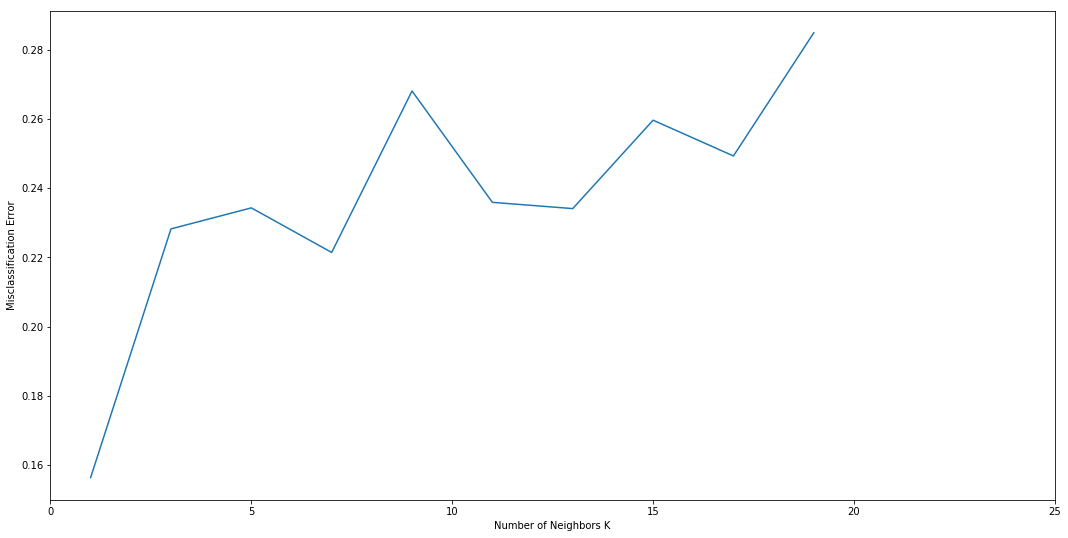

In [26]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
